In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
col_UPDRS=[ 'NP1COG', 'NP1HALL', 'NP1DPRS',
       'NP1ANXS', 'NP1APAT', 'NP1DDS', 'NP2SPCH', 'NP2SALV', 'NP2SWAL',
       'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN',
       'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP3SPCH', 'NP3FACXP',
       'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'PN3RIGRL', 'NP3RIGLL', 'NP3FTAPR',
       'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR',
       'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT',
       'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR',
       'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ',
       'NP3RTCON','NHY','MSEADLG', 'DYSKPRES', 'ON_OFF_DOSE', 'PD_MED_USE',
       'NP4WDYSK', 'NP4DYSKI', 'NP4OFF', 'NP4FLCTI', 'NP4FLCTX', 'NP4DYSTN']

In [7]:
file_path='/Users/alicemartin/02_DSR_Project/parkinson-disease-project/output/pre-processing/dfFinal.csv'
file_path='/Users/alicemartin/02_DSR_Project/parkinson-disease-project/output/pre-processing/dfFinal.csv'
df=pd.read_csv(file_path)
df.drop(columns='Unnamed: 0',inplace=True)
df.head(2)

,PATNO,EVENT_ID,INFODT,INFODT_date,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,...,DXPOSINS,DXOTHSX,DOMSIDE,num_visits,VISIT_ID,visitsdiff_days,lastDate_diff_days,PDDXDT_diff_days,PDMEDT_diff_days,PDSURGDT_diff_days
0,3001,SC,02/2011,2011-02-01,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,2,7,1,0,2707,306,0,0
1,3001,V04,03/2012,2012-03-01,1.0,0.0,1.0,1.0,1.0,0.0,...,0,0,2,7,2,394,2313,700,0,0


In [20]:
def heatmap_features(df,sel_feat,fig_name,vmax=0.5):
    '''correlation between features'''
    sns.set(style="white")
    
    print('there are {} features'.format(len(sel_feat)))
    d = df[sel_feat]

    # Compute the correlation matrix
    corr = d.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(90, 90))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    ax=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=vmax, center=0,
                square=True, linewidths=1, cbar_kws={"shrink": .5})
    ax.figure.suptitle('correlation between features')
        
    # saving figure
    plt_path_name='/Users/alicemartin/02_DSR_Project/parkinson-disease-project/output/EDA/features_heatmap'
    plt_path_name=plt_path_name+fig_name
    ax.figure.savefig(fname=plt_path_name)

there are 63 features


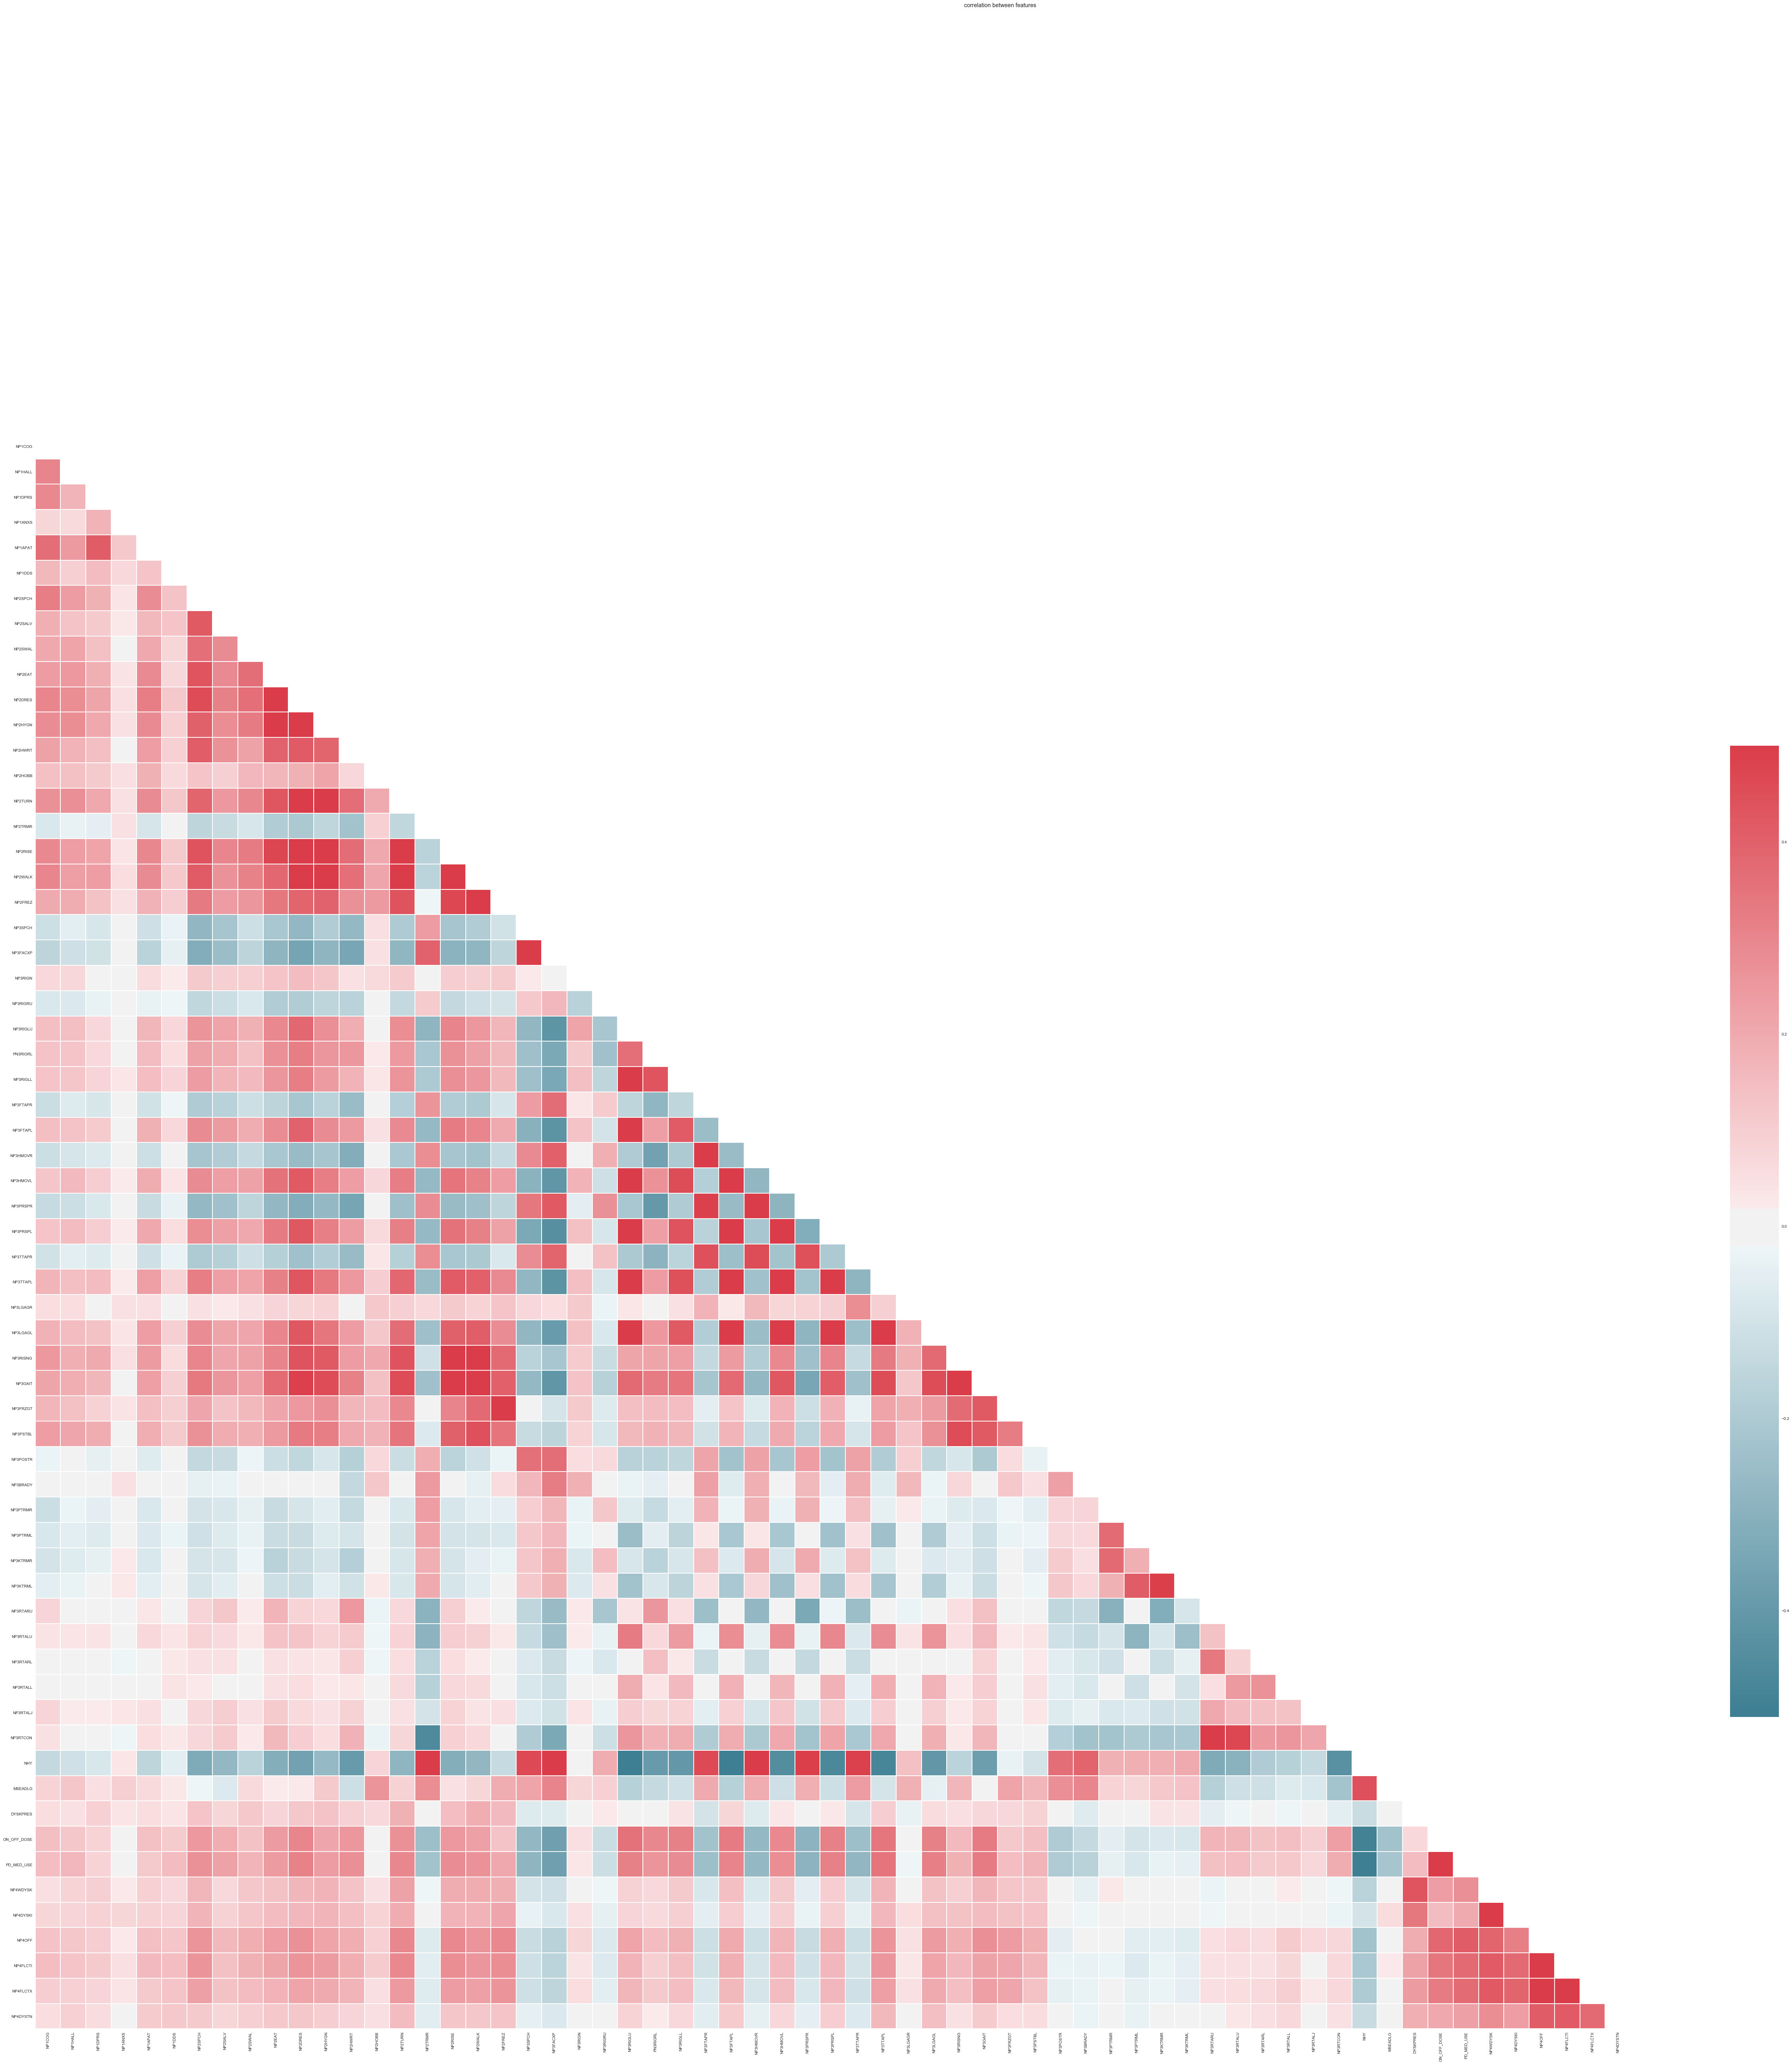

In [24]:
heatmap_features(df,col_UPDRS,'_UPDRS_bis.png')

there are 63 features


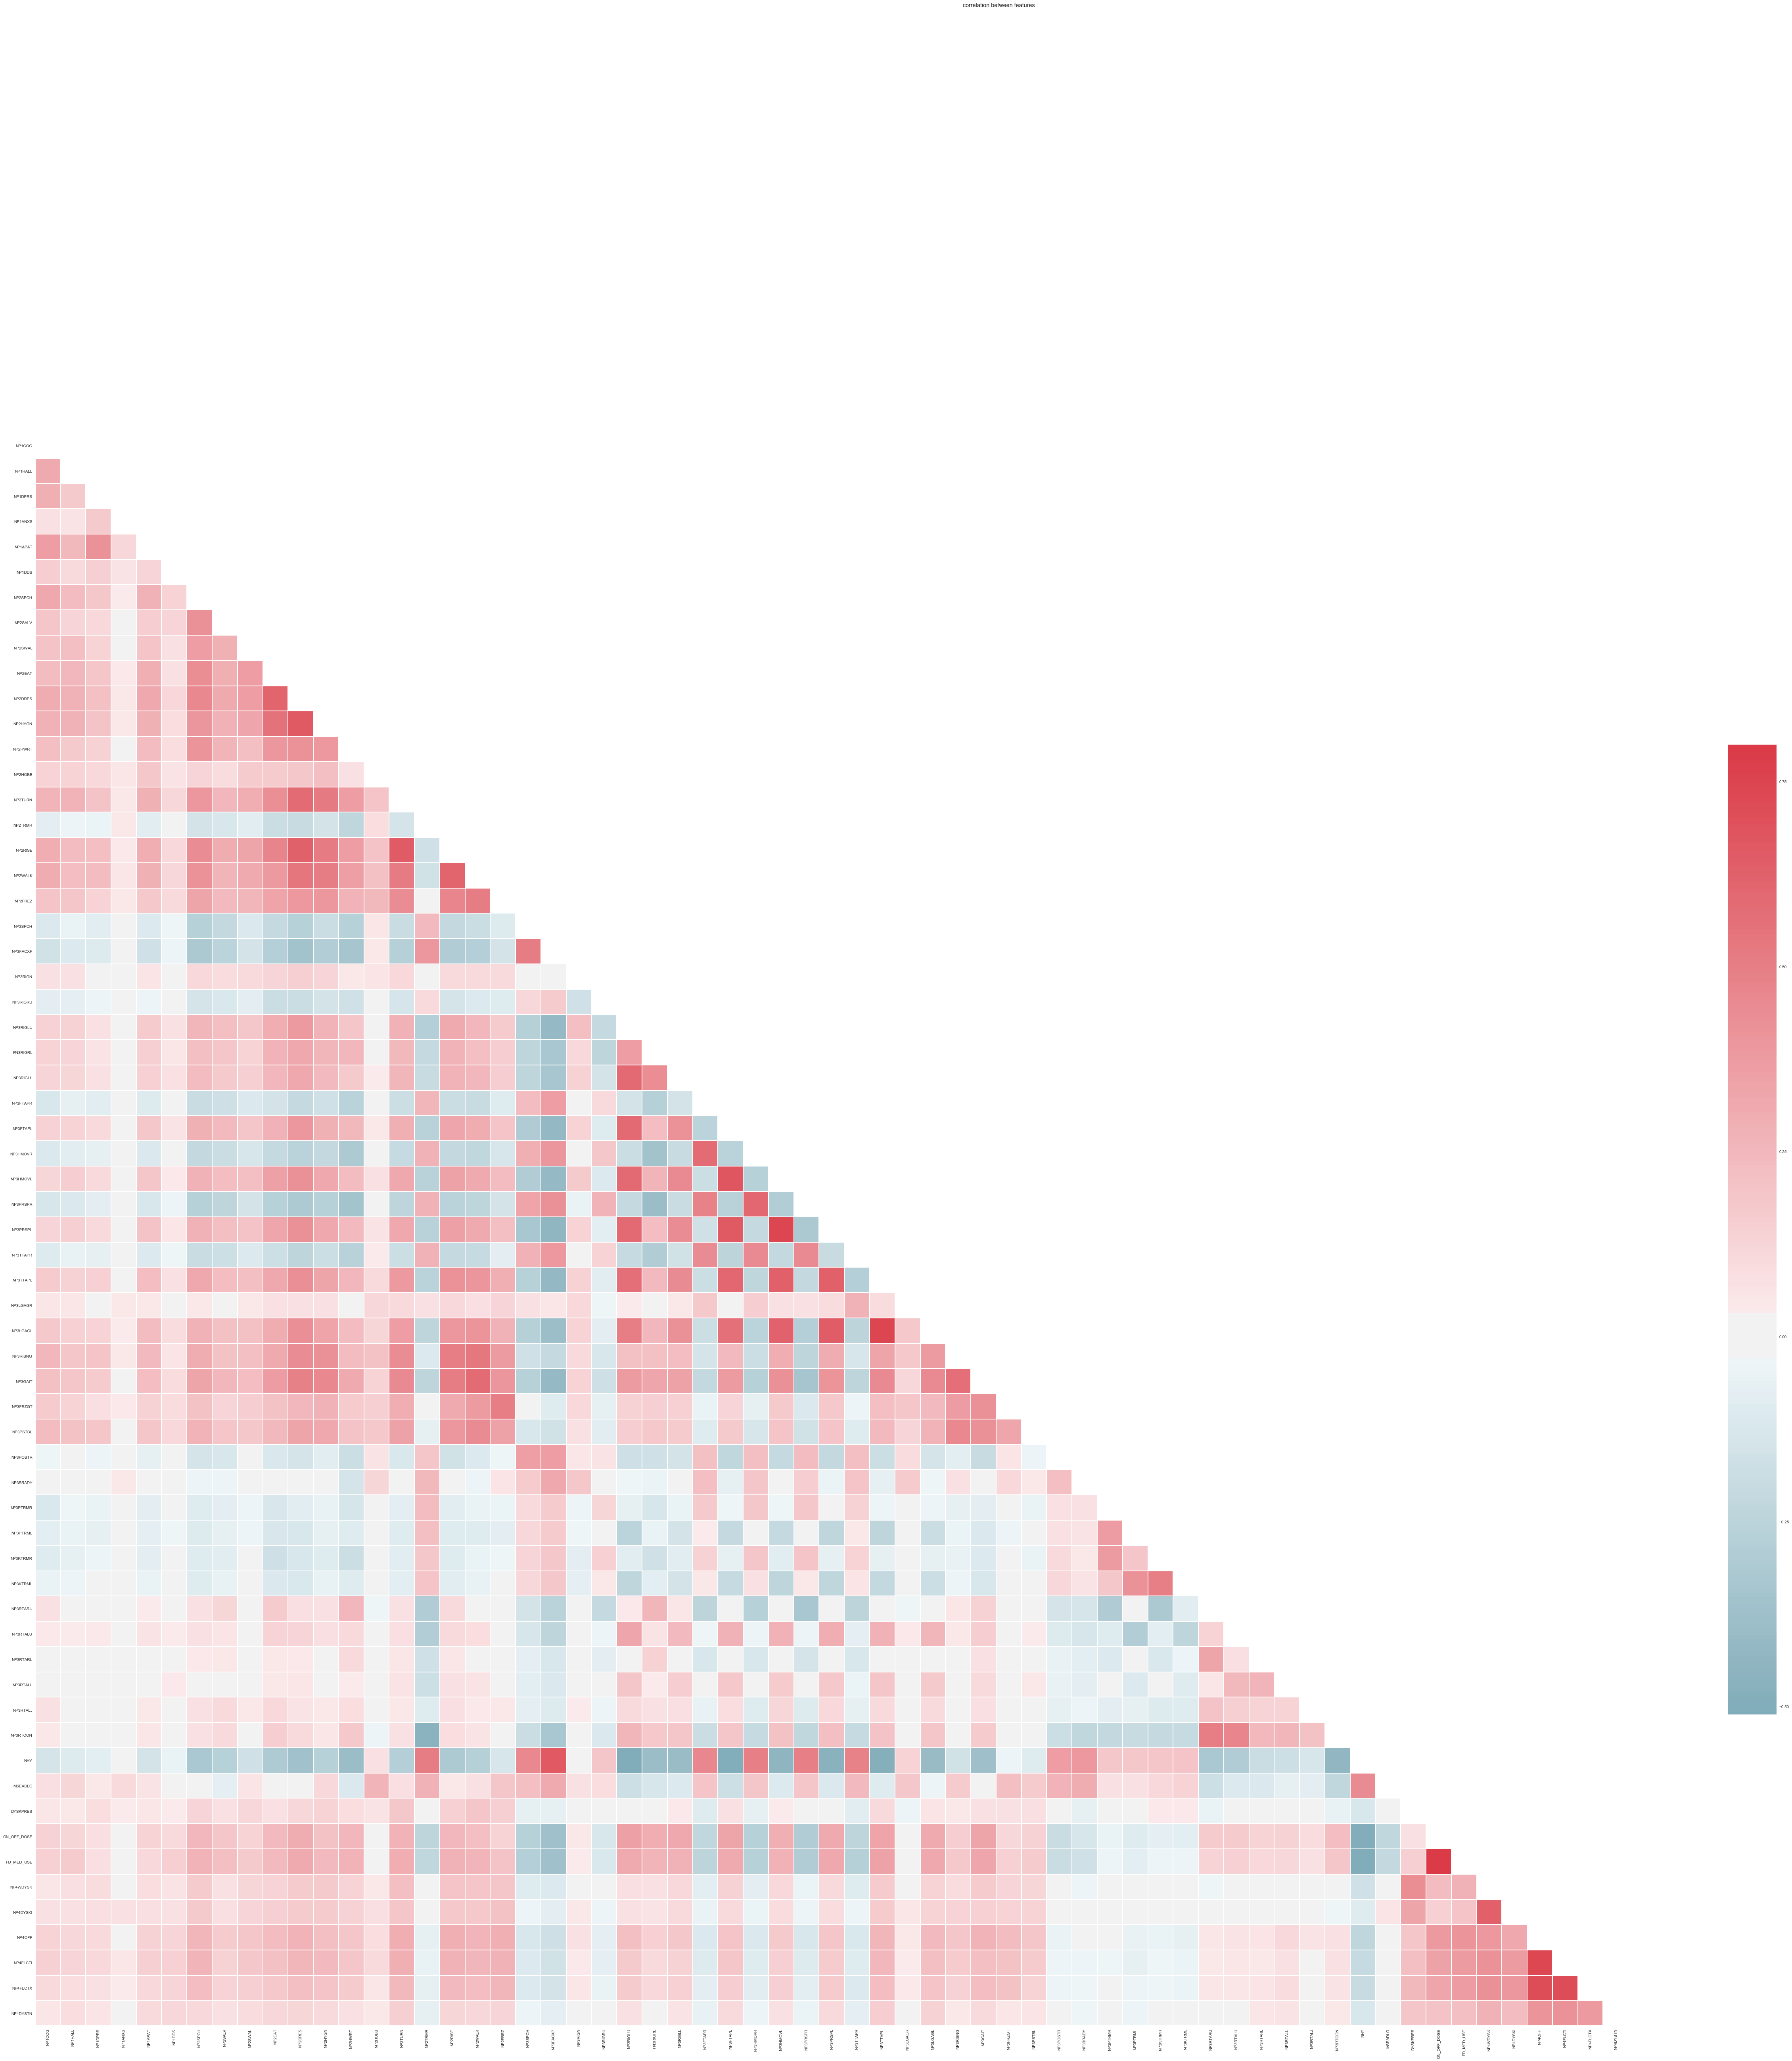

In [25]:
heatmap_features(df,col_UPDRS,'_UPDRS-0.8_bis.png',vmax=0.8)